# Implementación de un sistema de detección y monitoreo de desbordamientos de ríos usando procesamiento digital de imágenes satelitales con Python

## Proceso inicial

La libreria earthpy debe estar instalado necesariamente

In [1]:
!pip install earthpy

Defaulting to user installation because normal site-packages is not writeable


Llamar a las librerias

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Cambiar data a el directorio donde se sacarán los datos

In [3]:
%cd /home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar

/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar


In [4]:
# generar un path a la carpeta del mapa
path_madagascar = "/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar"

Generar la ruta para la data antes y durante las inundaciones.

In [5]:
before_floods_data_path = "Madagascar_18_01_2017"
during_floods_data_path = "Madagascar_27_01_2020"

## Antes de las inundaciones

In [6]:
before_floods = glob(f"{path_madagascar}/Madagascar_18_01_2017/*B?*.tiff") 
# ordenar la data
before_floods.sort()
# print
before_floods

['/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 '/home/luis/Documen

In [7]:
l = []

for i in before_floods:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

arr_bef = np.stack(l)

In [8]:
arr_bef.shape

(9, 602, 676)

### Visualización de la data

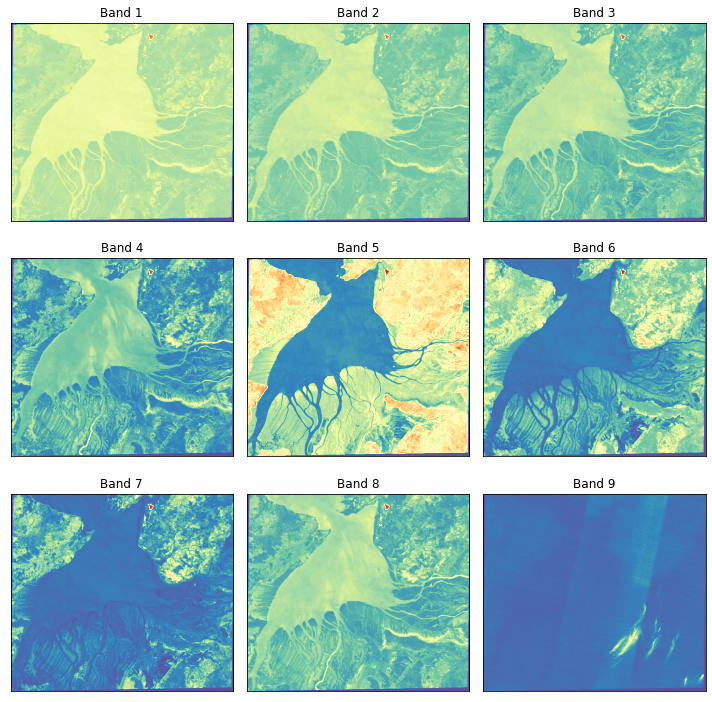

In [9]:
# visualizar bandas
ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)
plt.show()

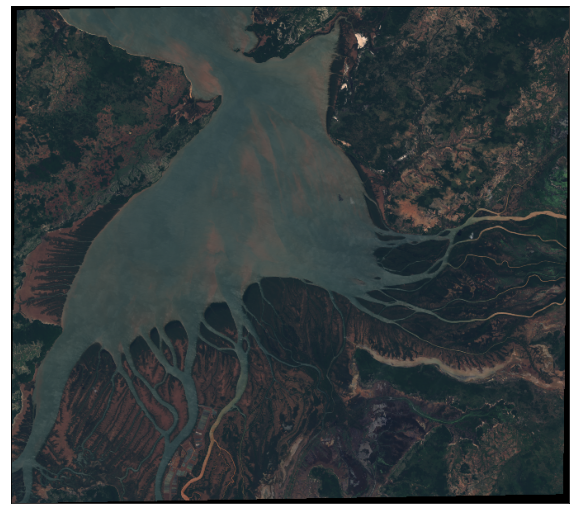

In [10]:
# Visualizar las imágenes compuestas mediante RGB
ep.plot_rgb(arr_bef, rgb=(3, 2, 1), figsize=(10, 10))
plt.show()

### Buscar el índice de diferencia de agua normalizada (NDWI) - Normalized Difference Water Index

Fórmula:

$$\mbox{NDWI} = \frac{\mbox{NIR} - \mbox{SWIR}} {\mbox{NIR} + \mbox{SWIR}}$$

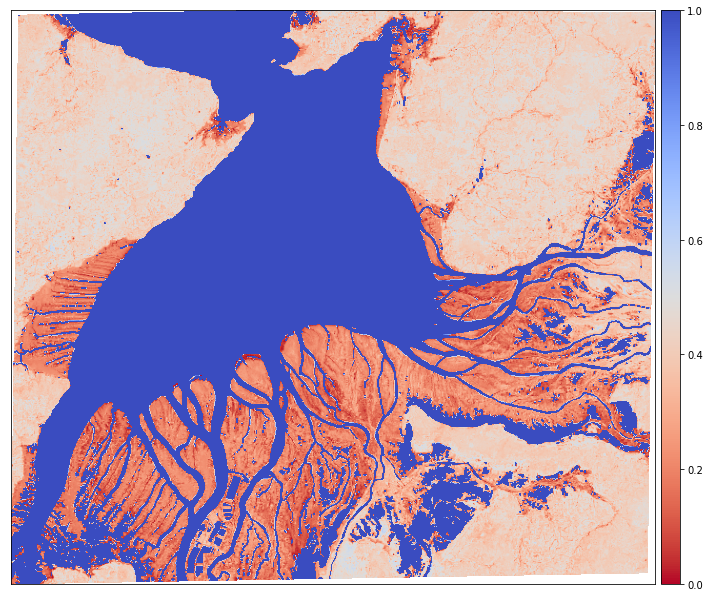

In [55]:
# NIR - 5
# SWIR - 6, 7
ndwi_bef = es.normalized_diff(arr_bef[5, :, :], arr_bef[7, :, :])

# ploteo de bandas antes de las inundaciones
ep.plot_bands(ndwi_bef, cmap='coolwarm_r', vmin=0, vmax=1)

plt.show()

## Durante las inundaciones

In [13]:
during_floods = glob(f"{path_madagascar}/Madagascar_27_01_2020/*B?*.tiff")
during_floods.sort()
during_floods

['/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/PROYECTO/data-de-satelite/madagascar/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 '/home/luis/Documen

In [14]:
dl = []
for i in during_floods:
  with rio.open(i, 'r') as f:
    dl.append(f.read(1))

arr_dur = np.stack(dl)

In [15]:
arr_dur.shape

(9, 602, 676)

### Visualización de la data

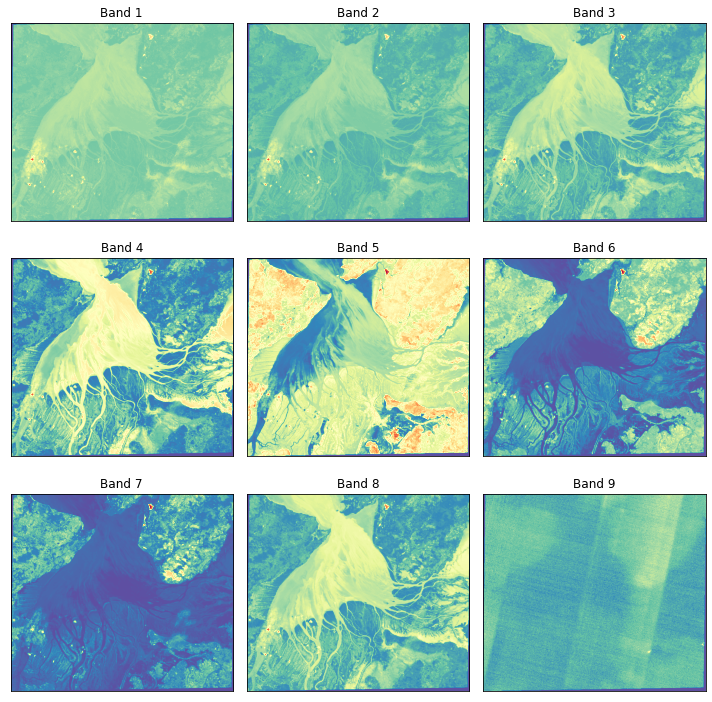

In [16]:
# Visualización de la data
ep.plot_bands(arr_dur, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)

plt.show()

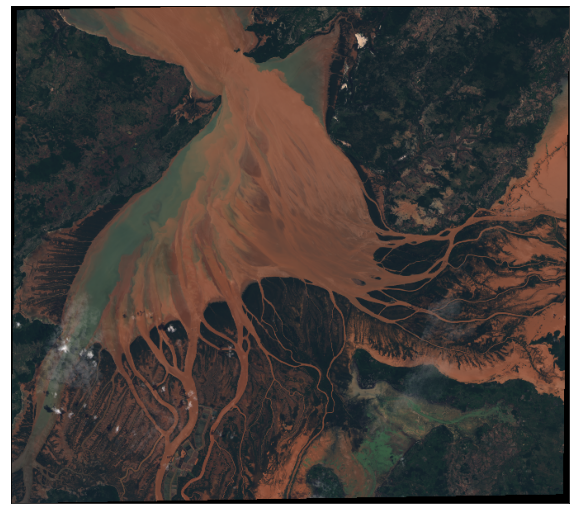

In [31]:
# Visualización de imágen RGB compuesta
ep.plot_rgb(arr_dur, rgb=(3, 2, 1), figsize=(10, 10))

plt.show()

### Índice de diferencia de agua normalizado

Fórmula:

$$\mbox{NDWI} = \frac{\mbox{NIR} - \mbox{SWIR}}{\mbox{NIR} + \mbox{SWIR}}$$


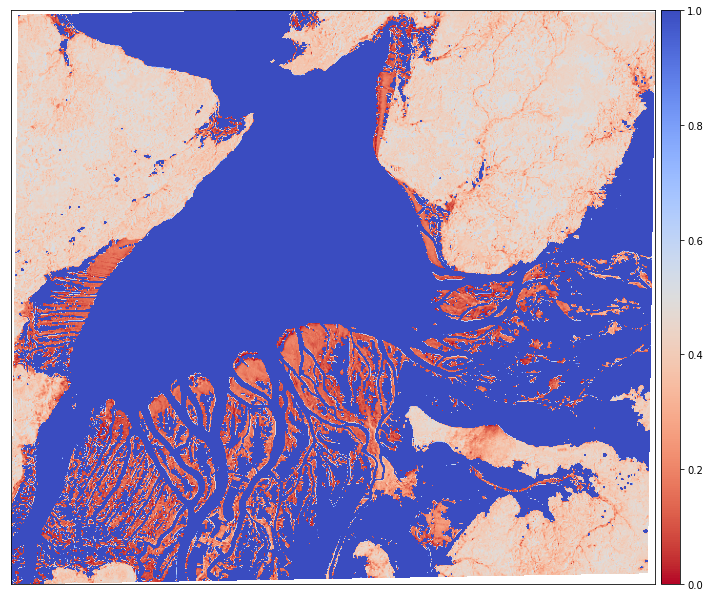

In [51]:
# NIR - 5
# SWIR - 6, 7
ndwi_dur = es.normalized_diff(arr_dur[5, :, :], arr_dur[7, :, :])

# ploteo de bandas 
ep.plot_bands(ndwi_dur, cmap='coolwarm_r', vmin=0, vmax=1)

plt.show()

## Mapeo de inundaciones

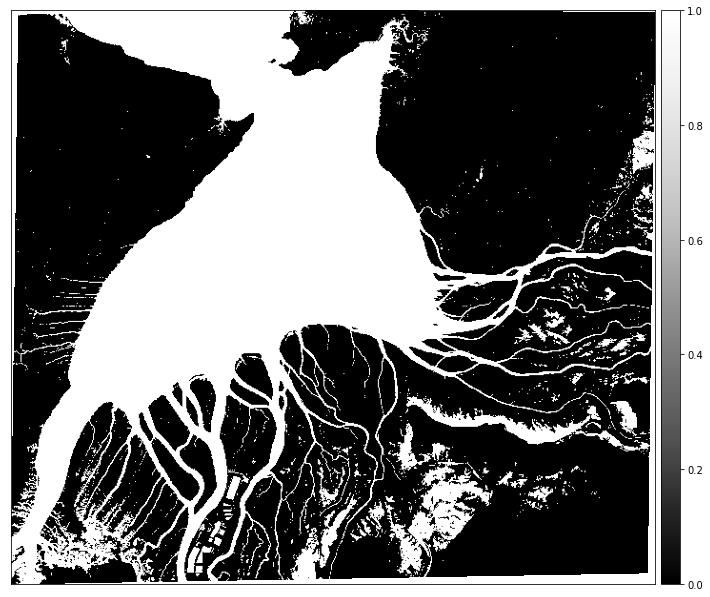

In [20]:
# Antes de las inundaciones
# Enmascarar la data en pixeles donde haya agua y donde no haya basado en un valor del umbral 0.6
mask_bef = (ndwi_bef > 0.6).astype(int)

ep.plot_bands(mask_bef, cmap='Greys_r', figsize=(12, 12))
plt.show()

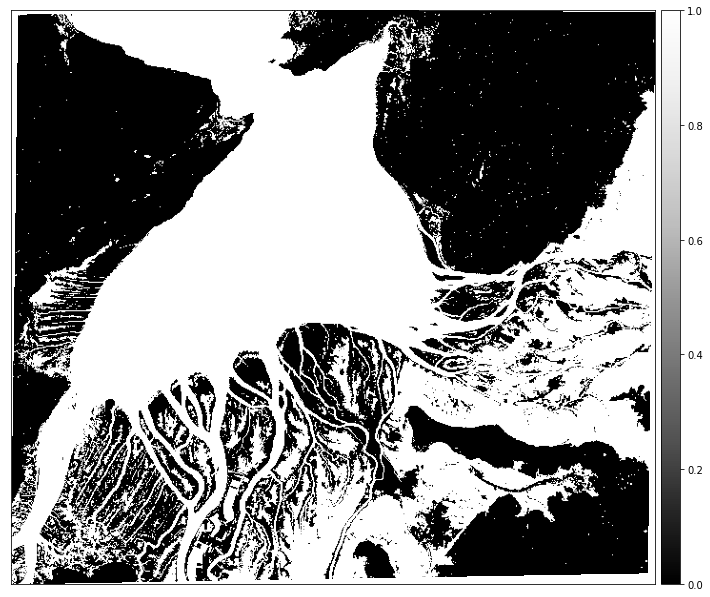

In [21]:
# Durante las inundaciones
# Enmascarar la data en pixeles donde haya agua y donde no haya, basado en un valor del umbral 0.6
mask_dur = (ndwi_dur > 0.6).astype(int)

ep.plot_bands(mask_dur, cmap='Greys_r', figsize=(12, 12))
plt.show()

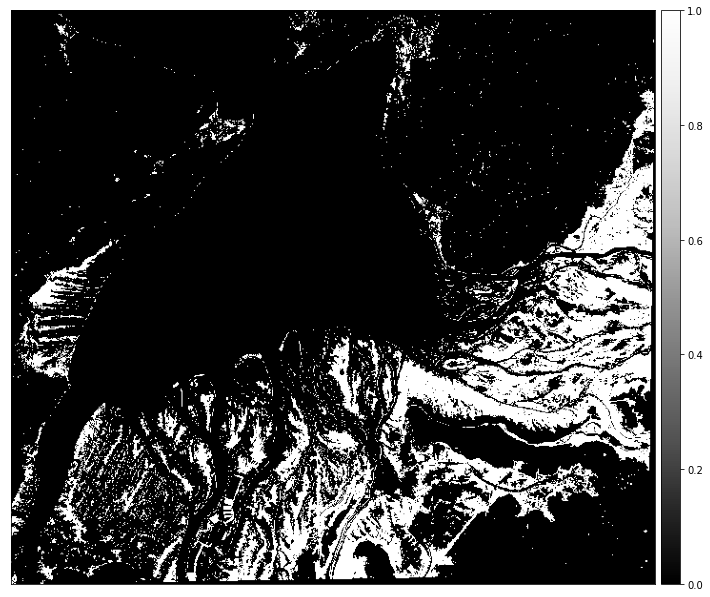

In [22]:
# Diferencia de inundaciones
mask_diff = (mask_dur - mask_bef)

mask_diff = np.where(mask_diff <0, 0, mask_diff)

ep.plot_bands(mask_diff, cmap='Greys_r', figsize=(12, 12))
plt.show()

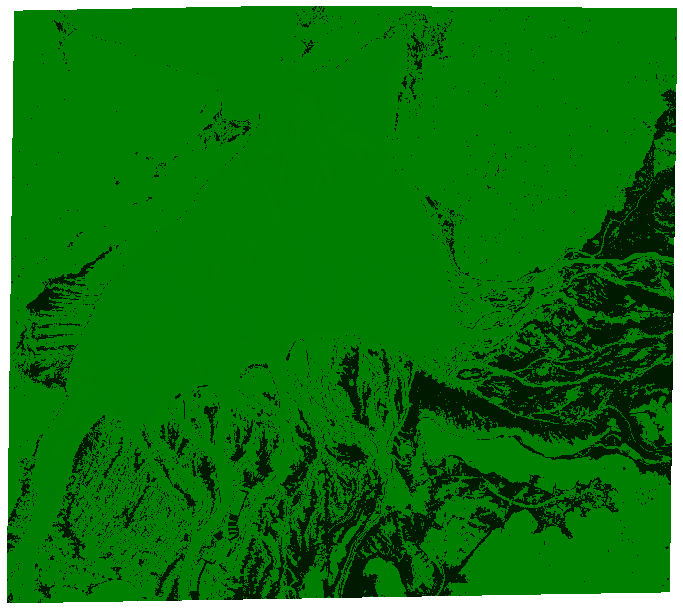

In [23]:
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# create dummy data
zvals = ndwi_dur
zvals2 = mask_diff

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

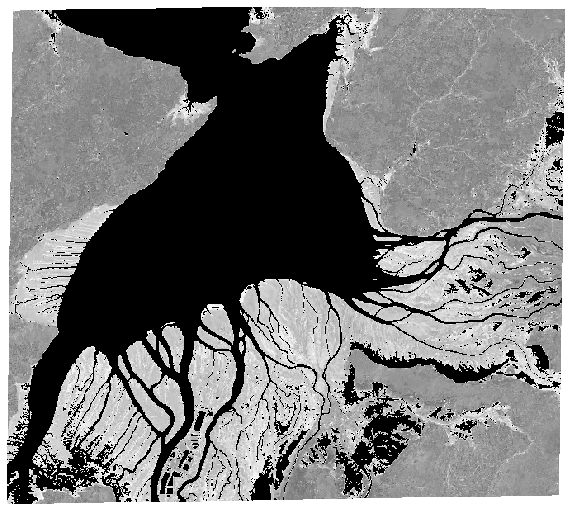

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(ndwi_bef, vmin=0, vmax=1, cmap='gray_r', interpolation='none')

plt.axis('off')
plt.show()

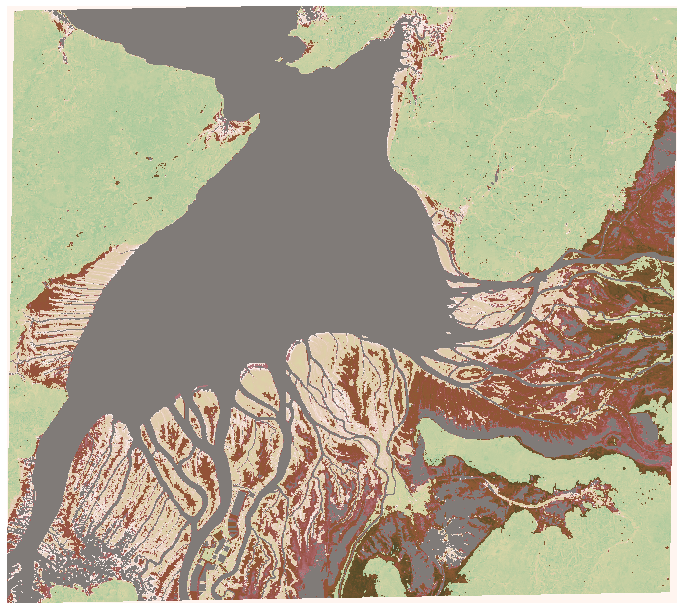

In [25]:
fig = plt.figure(figsize=(12, 12))

plt.imshow(mask_diff, vmin=0, vmax=1, cmap='Reds', interpolation='none')
plt.imshow(ndwi_bef, vmin=0, vmax=1, cmap='gist_earth_r', interpolation='none', alpha=0.5)

plt.axis('off')
plt.show()

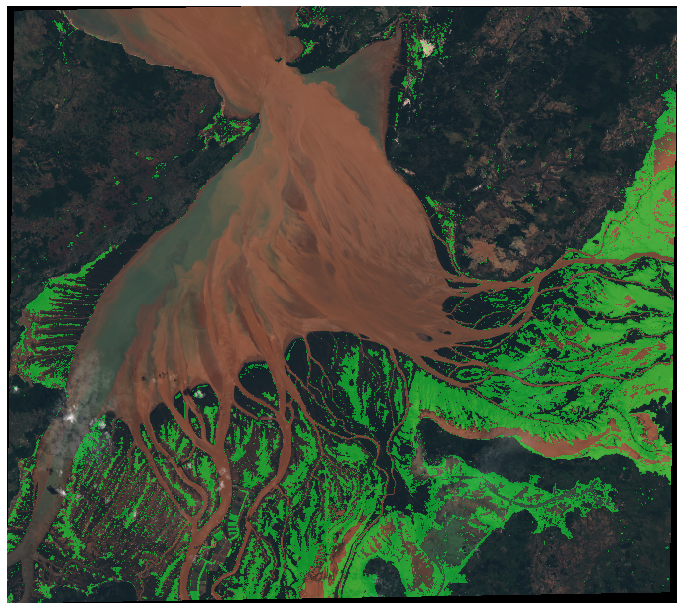

In [26]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 12))

rgb = np.moveaxis(np.stack([dl[3], dl[2], dl[1]]), 0, -1)
Image = rgb/np.amax(rgb)
Image = np.clip(Image, 0, 1)


plt.imshow(Image, interpolation='none')
plt.imshow(mask_diff, vmin=0, vmax=1, 
           cmap=ListedColormap(['#ffffff00', '#00FF33']), 
           interpolation='none' , alpha=0.5)

plt.axis('off')
# plt.savefig('flood_result.png', dpi=400)

plt.show()